<a href="https://colab.research.google.com/github/metheboss1/quant-research-lab/blob/experiment_3/03_performance_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

END = pd.Timestamp.today().strftime('%Y-%m-%d')
START = "2010-01-01"

tickers = ["SPY", "QQQ", "TSLA", "NVDA"]

In [2]:
data = yf.download(
    tickers,
    start=START,
    end=END,
    interval="1d",
    progress=False
)

close = data["Close"].dropna()
close.tail()

/tmp/ipython-input-3142892653.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(


Ticker,NVDA,QQQ,SPY,TSLA
Date,,,,
2025-12-01,179.909988,617.169983,680.270020,430.140015
2025-12-02,181.449905,622.000000,681.530029,429.239990
2025-12-03,179.580002,623.520020,683.890015,446.739990
2025-12-04,183.380005,622.940002,684.390015,454.529999
2025-12-05,182.410004,625.479980,685.690002,455.000000


In [3]:
returns = close.pct_change().dropna()
returns.tail()

Ticker,NVDA,QQQ,SPY,TSLA
Date,,,,
2025-12-01,0.016497,-0.003359,-0.004565,-0.000070
2025-12-02,0.008559,0.007826,0.001852,-0.002092
2025-12-03,-0.010305,0.002444,0.003463,0.040770
2025-12-04,0.021161,-0.000930,0.000731,0.017437
2025-12-05,-0.005290,0.004077,0.001899,0.001034


In [4]:
cum_returns = (1 + returns).cumprod()
cum_returns.tail()

Ticker,NVDA,QQQ,SPY,TSLA
Date,,,,
2025-12-01,748.967383,16.273069,8.598593,270.075301
2025-12-02,755.378076,16.400423,8.614520,269.510196
2025-12-03,747.593645,16.440502,8.644350,280.498054
2025-12-04,763.413103,16.425209,8.650670,285.389227
2025-12-05,759.374976,16.492181,8.667102,285.684330


In [5]:
sharpe = (returns.mean() / returns.std()) * np.sqrt(252)
sharpe

,0
Ticker,
NVDA,1.167991
QQQ,0.985487
SPY,0.904140
TSLA,0.922013


In [6]:
roll_max = cum_returns.cummax()
drawdown = (cum_returns - roll_max) / roll_max
max_drawdown = drawdown.min()

drawdown.tail(), max_drawdown

(Ticker          NVDA       QQQ       SPY      TSLA
 Date                                              
 2025-12-01 -0.130989 -0.029256 -0.010358 -0.103613
 2025-12-02 -0.123551 -0.021659 -0.008525 -0.105489
 2025-12-03 -0.132583 -0.019268 -0.005092 -0.069020
 2025-12-04 -0.114228 -0.020180 -0.004364 -0.052786
 2025-12-05 -0.118913 -0.016185 -0.002473 -0.051807,
 Ticker
 NVDA   -0.663351
 QQQ    -0.351187
 SPY    -0.337173
 TSLA   -0.736322
 dtype: float64)

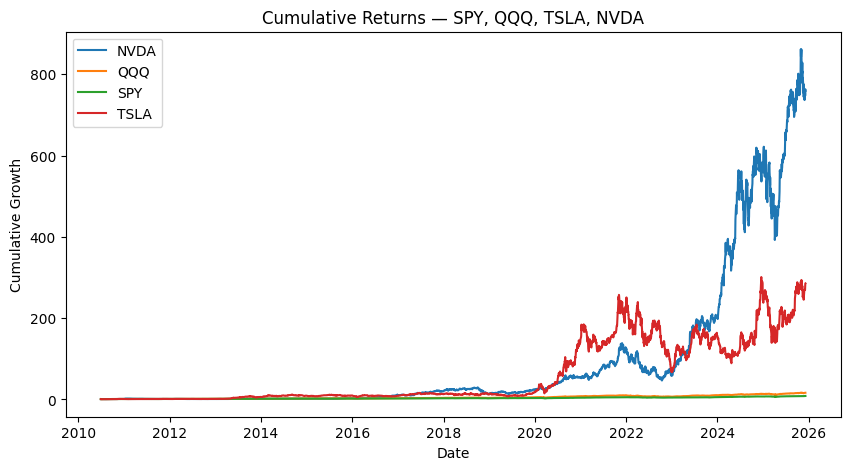

In [7]:
plt.figure(figsize=(10,5))
plt.plot(cum_returns)
plt.title("Cumulative Returns — SPY, QQQ, TSLA, NVDA")
plt.xlabel("Date")
plt.ylabel("Cumulative Growth")
plt.legend(cum_returns.columns)
plt.show()

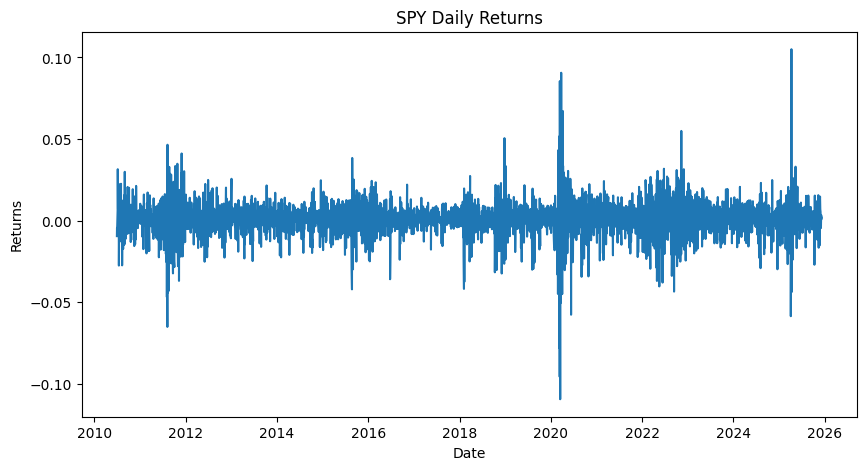

In [8]:
plt.figure(figsize=(10,5))
plt.plot(returns["SPY"])
plt.title("SPY Daily Returns")
plt.xlabel("Date")
plt.ylabel("Returns")
plt.show()

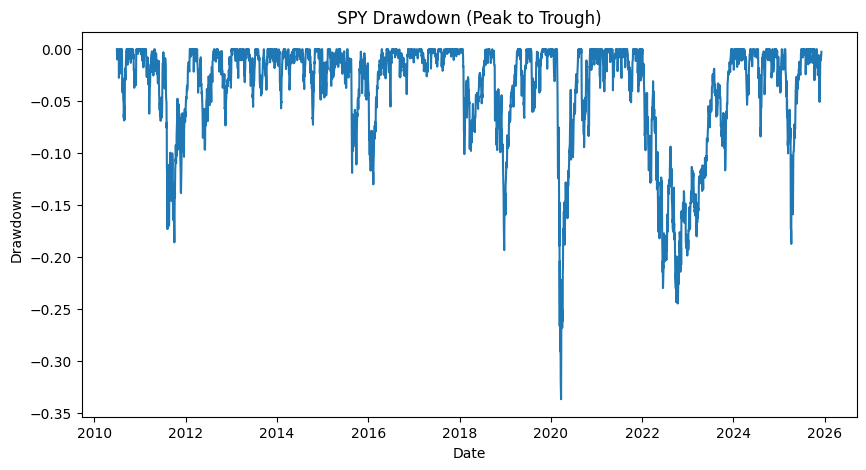

In [9]:
plt.figure(figsize=(10,5))
plt.plot(drawdown["SPY"])
plt.title("SPY Drawdown (Peak to Trough)")
plt.xlabel("Date")
plt.ylabel("Drawdown")
plt.show()

DAY 3 — Performance Metrics Analysis
Today I implemented hedge-fund-grade performance analytics:
Metrics computed
Daily Returns: shows volatility, risk, noise


Cumulative Returns: tracks long-term growth


Sharpe Ratio: measures risk-adjusted performance


Drawdowns: measures peak-to-trough loss (crucial for risk control)


Max Drawdown: worst historical loss depth


Key Insights
Tech assets (TSLA, NVDA) show the highest volatility and largest drawdowns.


SPY is the most stable and has the smallest drawdowns.


QQQ typically has the highest Sharpe ratio for long-term consistency.


Drawdown analysis highlights market crashes (2018, 2020, 2022, 2024).


Why this matters
These metrics form the mathematical backbone of:
Backtesting


Portfolio optimization


Signal development


ML factor research


Risk management